## Segmentez des clients d'un site e-commerce

Contexte : 

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

Mission :


Aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Chargement du jeu de données

In [2]:
# Infos sur les achats
orders = pd.read_csv( "olist_orders_dataset.csv")
# Infos sur les payments
payments = pd.read_csv("olist_order_payments_dataset.csv")
# Infos sur les clients
customers = pd.read_csv( "olist_customers_dataset.csv")
# Infos sur les produits
products = pd.read_csv( "olist_products_dataset.csv")
# Infos sur l'évaluation des produits
reviews = pd.read_csv( "olist_order_reviews_dataset.csv")
# Infos sur les items
items = pd.read_csv("olist_order_items_dataset.csv")
# Infos sur les catégories des produits
category = pd.read_csv("product_category_name_translation.csv")
# Infos sur les vendeurs
sellers = pd.read_csv("olist_sellers_dataset.csv")
# Infos sur la géolocalisation
geo = pd.read_csv("olist_geolocation_dataset.csv")

# connaissance du jeu de données

## information sur les commandes

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


 - order_id: identifiant unique de la commande
 - customer_id : Clé du jeu de données des clients. Chaque commande a un identifiant client unique.
 - order_status : Référence au statut de la commande (livrée, expédiée, etc.)
 - order_purchase_timestamp: Indique l'horodatage de l'achat
 -  order_approved_at : Indique l'horodatage de l'approbation du paiement datetime
 - order_delivered_carrier_date : Indique l'horodatage de la commande. Il s'agit de la date à laquelle la commande a été traitée par le partenaire logistique.
 - order_delivered_customer_date : Indique la date réelle de livraison de la commande au client
 - order_estimated_delivery_date : Indique la date de livraison estimée qui a été communiquée au client au moment de l'achat

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Transformer les variables représentant des dates/heures en Datetime
cols = ['order_purchase_timestamp', 'order_approved_at',
        'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in cols:
    orders[col] = pd.to_datetime(orders[col])

Text(0, 0.5, 'Fréquence des données')

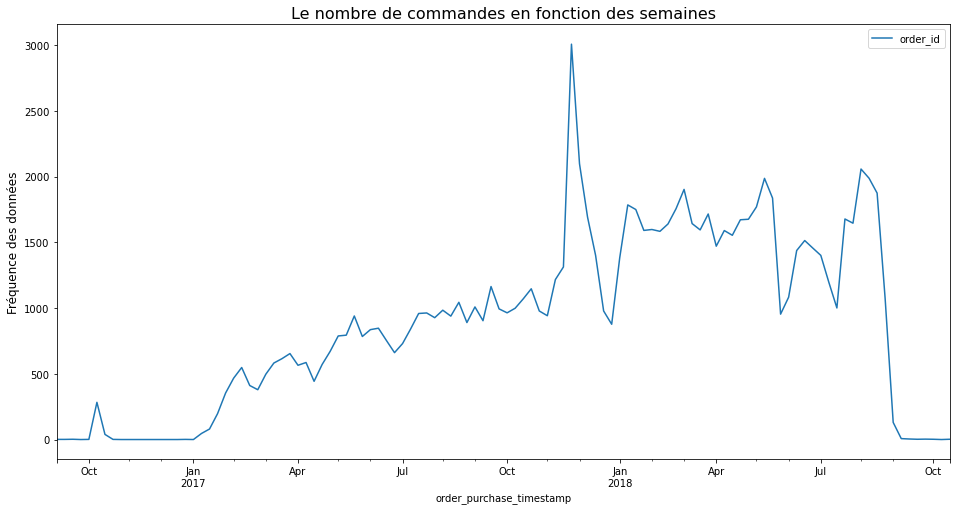

In [6]:
counts = orders.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='W')).count()
fig= plt.figure(figsize=(16, 8))
ax = fig.gca()
counts.plot(y="order_id",ax= ax)
plt.title("Le nombre de commandes en fonction des semaines", fontsize=16)
plt.ylabel("Fréquence des données", fontsize=12)


on va supprimer les données avant jan 2017 et après sept 2018

In [7]:
orders = orders[~(orders['order_purchase_timestamp'] < '2017-01-01')]

In [8]:
orders = orders[~(orders['order_purchase_timestamp'] > '2018-09-01')]

Text(0, 0.5, 'Fréquence des données')

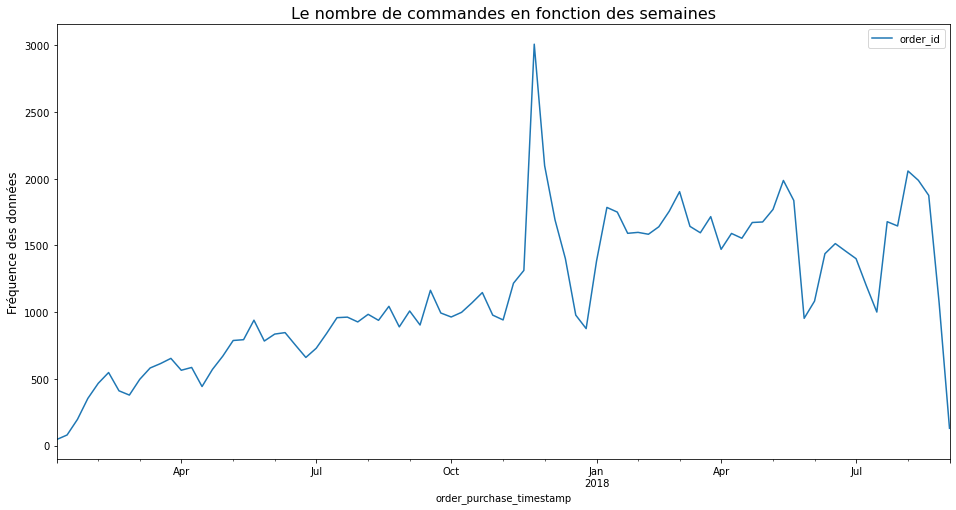

In [9]:
counts = orders.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='W')).count()
fig= plt.figure(figsize=(16, 8))
ax = fig.gca()
counts.plot(y="order_id",ax= ax)
plt.title("Le nombre de commandes en fonction des semaines", fontsize=16)
plt.ylabel("Fréquence des données", fontsize=12)

In [10]:
orders['order_status'].value_counts()

delivered      96211
shipped         1097
unavailable      602
canceled         580
processing       299
invoiced         296
created            5
approved           2
Name: order_status, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

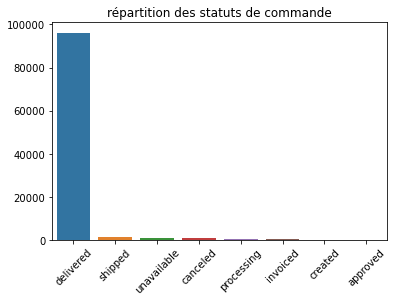

In [11]:
comptage_order_status = orders['order_status'].value_counts()
sns.barplot(data=orders, x=comptage_order_status.index , y = comptage_order_status.values).set_title("répartition des statuts de commande")
plt.xticks(rotation=45)

On ne garde que les commandes de type " delivered"

In [12]:
orders = orders[orders["order_status"]=="delivered"]

In [13]:
orders['order_status'].value_counts()

delivered    96211
Name: order_status, dtype: int64

In [14]:
def delete_outliers(df):
    for column in df._get_numeric_data().columns:
        "outliers aux extrémités des distributions"
        df.loc[df[column] > df[column].quantile(0.995), column] = np.nan
        df.loc[df[column] < df[column].quantile(0.005), column] = np.nan
    return df

In [15]:
orders.shape

(96211, 8)

In [16]:
orders = delete_outliers(orders)

In [17]:
orders.shape

(96211, 8)

## information sur le payments

In [18]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [20]:
payments["payment_type"].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Text(0.5, 1.0, 'répartition des moyens de paiements')

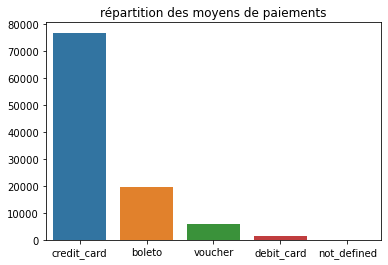

In [21]:
sns.barplot(data=payments, x=payments["payment_type"].value_counts().index , y = payments["payment_type"].value_counts().values).set_title("répartition des moyens de paiements")

In [22]:
payments.drop(payments[payments.payment_type == "not_defined"].index, inplace=True)

In [23]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  object 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  object 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [24]:
payments["payment_installments"].describe()

count    103883.000000
mean          2.853402
std           2.687071
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

Text(0.5, 1.0, 'Histogramme de nombre de payements')

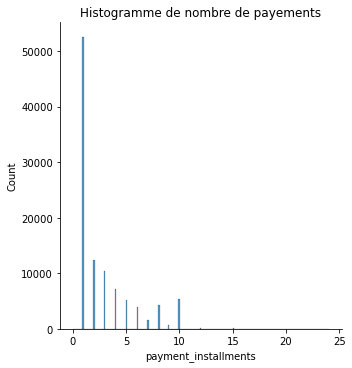

In [25]:
sns.displot(payments, x="payment_installments")
plt.title("Histogramme de nombre de payements")

In [26]:
payments["payment_value"].describe()

count    103883.000000
mean        154.104831
std         217.495628
min           0.000000
25%          56.800000
50%         100.000000
75%         171.840000
max       13664.080000
Name: payment_value, dtype: float64

Text(0.5, 1.0, 'Histogramme montant des commandes')

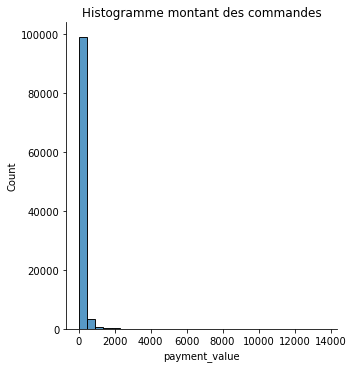

In [26]:
sns.displot(payments, x="payment_value", bins=30 )
plt.title("Histogramme montant des commandes")

In [27]:
payments.shape

(103883, 5)

In [28]:
payments = delete_outliers(payments)

In [29]:
payments.shape

(103883, 5)

## information sur les clients

In [30]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [31]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [32]:
nb_client = customers['customer_unique_id'].nunique()
nb_client

96096

In [33]:
series_commande_par_client = customers.groupby('customer_unique_id').size().value_counts()
series_commande_par_client 

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
17        1
9         1
dtype: int64

In [34]:
df_commandes = pd.DataFrame({'Nb_commandes': series_commande_par_client.index,
                             'Nb_clients': series_commande_par_client.values})

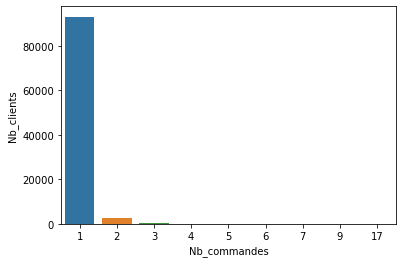

In [35]:
sns.barplot(x='Nb_commandes', y='Nb_clients',    data=df_commandes)

Text(0.5, 1.0, 'les villes ayant le plus de commande de clients')

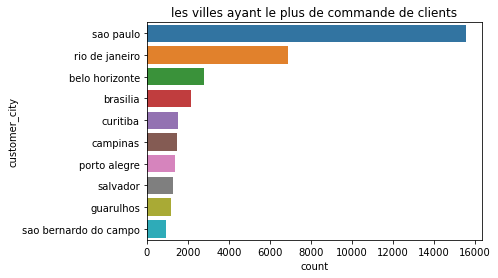

In [36]:
sns.countplot(y="customer_city", data=customers, order=pd.value_counts(customers['customer_city']).iloc[:10].index).set_title("les villes ayant le plus de commande de clients")

In [38]:
customers.shape

(99441, 5)

In [37]:
customers = delete_outliers(customers)

In [38]:
customers.shape

(99441, 5)

## information sur les catégories

In [39]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [40]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## information sur les produits

In [41]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [43]:
products = products.merge( category, on='product_category_name', how="left")

In [44]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [45]:
products['product_category_name'].value_counts().count()

73

In [46]:
# trouvze les catégories qui manquent
products[products['product_category_name_english']
            .isna() & products['product_category_name']
            .notnull()][['product_category_name_english','product_category_name']]

,product_category_name_english,product_category_name
1628,NaN,pc_gamer
5821,NaN,portateis_cozinha_e_preparadores_de_alimentos
7325,NaN,portateis_cozinha_e_preparadores_de_alimentos
7478,NaN,pc_gamer
8819,NaN,portateis_cozinha_e_preparadores_de_alimentos
11039,NaN,portateis_cozinha_e_preparadores_de_alimentos
14266,NaN,portateis_cozinha_e_preparadores_de_alimentos
16182,NaN,portateis_cozinha_e_preparadores_de_alimentos
16930,NaN,pc_gamer
17800,NaN,portateis_cozinha_e_preparadores_de_alimentos


In [47]:
#imputation pour les deux catégories qui manquent
products.loc[products['product_category_name'] == "pc_gamer","product_category_name_english"] = "pc_gamer"
products.loc[products['product_category_name'] == "portateis_cozinha_e_preparadores_de_alimentos","product_category_name_english"] = "kitchen_and_food_preparation_racks"

In [48]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32341 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [49]:
del(category)

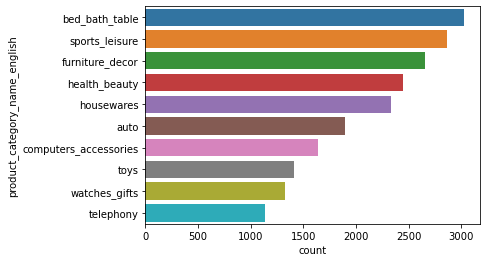

In [50]:
sns.countplot(y="product_category_name_english", data=products, 
             order = products["product_category_name_english"].value_counts().index[:10])

## info sur les avis 

In [51]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


- review_id : identifiant unique des avis
- order_id : identifiant unique de la commande
- review_score : Note allant de 1 à 5 donnée par le client dans une enquête de satisfaction.
- review_comment_title : Titre du commentaire laissé par le client, en portugais
- review_comment_message : Message de commentaire de l'avis laissé par le client, en portugais.
- review_creation_date : Indique la date à laquelle l'enquête de satisfaction a été envoyée au client.
- review_answer_timestamp : Indique l'horodatage de la réponse à l'enquête de satisfaction.

In [52]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [53]:
avis = reviews['review_score'].value_counts()
avis

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

Text(0.5, 1.0, 'répartition des notes')

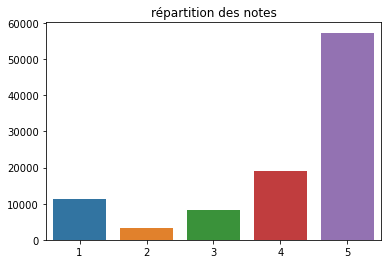

In [54]:
sns.barplot(x=avis.index, y=avis.values).set_title("répartition des notes")

In [55]:
reviews = reviews.drop(['review_comment_title',
                              'review_comment_message',
                              'review_creation_date',
                              'review_answer_timestamp'],
                             axis=1)

In [56]:
reviews.shape

(99224, 3)

In [57]:
reviews = delete_outliers(reviews)

In [58]:
reviews.shape

(99224, 3)

## information sur les Items

In [59]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


- order_id : identifiant unique de la commande
- order_item_id : numéro séquentiel identifiant le nombre d'articles inclus dans le même ordre
- product_id : identifiant unique du produit
- seller_id : identifiant unique du vendeur
- shipping_limit_date: Indique la date limite d'expédition du vendeur pour le transfert de la commande au partenairel logistique.
- price :prix de l'article
- freight_value :frais de livraison

In [60]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [61]:
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])

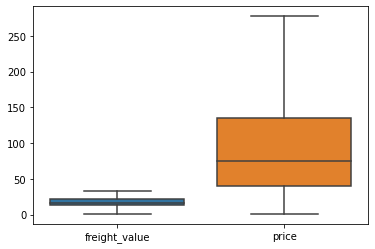

In [62]:
sns.boxplot(data=items, order=["freight_value", "price"], showfliers=False)

In [63]:
items.shape

(112650, 7)

In [64]:
items = delete_outliers(items)

In [65]:
items.shape

(112650, 7)

## information sur les vendeurs

In [66]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


- seller_id : identifiant unique du vendeur
- seller_zip_code_prefix : les 5 premiers chiffres du code postal du vendeur
- seller_city : ville du vendeur
- seller_state : État du vendeur

Text(0.5, 1.0, 'la distribution des  vendeurs par ville')

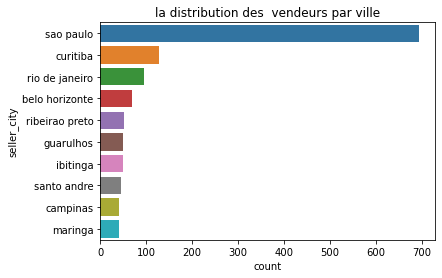

In [67]:
sns.countplot(y="seller_city", data=sellers, order=pd.value_counts(sellers['seller_city']).iloc[:10].index).set_title("la distribution des  vendeurs par ville")

In [68]:
sellers = delete_outliers(sellers)

In [69]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


# Jointure des dataframes

Fusionner les datasets selon les clé primaire: 
    - order_id
    - custumer_id
    - product_id
    - seller_id
    - zip_code_prefix

In [70]:
# merge order  + costumer
df = pd.merge(orders,customers, on='customer_id')

# merge df + payments
df = pd.merge(df, payments, on ="order_id")

# merge df + reviews
df = pd.merge(df, reviews , on = "order_id")

# merge df + items
df= pd.merge(df,items,on = "order_id")

# merge df + products
df = pd.merge(df, products, on ="product_id")

#merge df + sellers 
df = pd.merge(df , sellers, on = "seller_id")

#merge df + geo
#df= pd.merge(df,geo,on="zip_code_prefix")

In [71]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,2290.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114523,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20,2077f7ec37df79c62cc24b7b8f30e8c9,8528.0,...,516.0,2.0,750.0,30.0,28.0,28.0,construction_tools_lights,13660.0,porto ferreira,SP
114524,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455.0,...,729.0,2.0,2100.0,80.0,8.0,30.0,furniture_decor,13478.0,americana,SP
114525,ba4ff7bab012df64eed239c402ba6a0d,48ebd9467fef647e9a0cd9c1b9bdbe24,delivered,2018-01-11 23:07:22,2018-01-11 23:15:46,2018-01-22 21:32:12,2018-01-30 11:11:47,2018-02-09,5b4c417664eae14efe4633d6982812c2,84130.0,...,1671.0,4.0,500.0,17.0,6.0,21.0,electronics,1207.0,sao paulo,SP
114526,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08,e55e436481078787e32349cee9febf5e,39803.0,...,531.0,1.0,5900.0,41.0,21.0,41.0,furniture_decor,8320.0,sao paulo,SP


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114528 entries, 0 to 114527
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114528 non-null  object        
 1   customer_id                    114528 non-null  object        
 2   order_status                   114528 non-null  object        
 3   order_purchase_timestamp       114528 non-null  datetime64[ns]
 4   order_approved_at              114513 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114526 non-null  datetime64[ns]
 6   order_delivered_customer_date  114520 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114528 non-null  datetime64[ns]
 8   customer_unique_id             114528 non-null  object        
 9   customer_zip_code_prefix       113425 non-null  float64       
 10  customer_city                  114528 non-null  object        
 11  

In [73]:
df = df.drop(['review_id',
                  'seller_id'], axis=1)

In [74]:
df.shape

(114528, 34)

In [75]:
df["order_status"].value_counts()

delivered    114528
Name: order_status, dtype: int64

## Traitement des doublons 

In [76]:
print(f"Il existe {df.duplicated().sum()} lignes dupliquées.")
print(f"Il y avait  {df.shape[0]} lignes dans le dataframe.")
df = df.drop_duplicates(keep='first')
print(f"Il reste {df.shape[0]} dans le dataframe")

Il existe 736 lignes dupliquées.
Il y avait  114528 lignes dans le dataframe.
Il reste 113792 dans le dataframe


## Traitement des valeurs manquantes

In [77]:
df.isna().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000132
order_delivered_carrier_date     0.000018
order_delivered_customer_date    0.000070
order_estimated_delivery_date    0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.009623
customer_city                    0.000000
customer_state                   0.000000
payment_sequential               0.002935
payment_type                     0.000000
payment_installments             0.003621
payment_value                    0.010220
review_score                     0.000000
order_item_id                    0.002496
product_id                       0.000000
shipping_limit_date              0.000000
price                            0.009676
freight_value                    0.009790
product_category_name            0.014149
product_name_lenght              0

In [78]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [79]:
df.isna().mean()

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
customer_unique_id               0.0
customer_zip_code_prefix         0.0
customer_city                    0.0
customer_state                   0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
review_score                     0.0
order_item_id                    0.0
product_id                       0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
product_category_name            0.0
product_name_lenght              0.0
product_description_lenght       0.0
product_photos_qty               0.0
product_weight_g                 0.0
p

In [80]:
df.shape

(106776, 34)

In [82]:
df= df.reset_index()

In [83]:
df.to_feather("cleaned_data_jointed.feather")